## Union Find

### Disjoint Set
Sets that have no elements in common are known as disjoint sets. 
Two operations that can be performed on these sets are- find and union.

#### Find Operation
For two disjoint sets, the find operation is used to find a particular element.

#### Union Operation
It is used to combine two sets together. Graphically, we will add an edge between 2 disconneted graph to join them.
We will store these sets as tree, with each tree corresponding to a set.
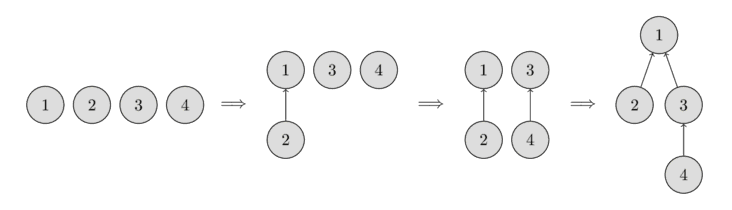
```
1. Each element begins as a single set which means each vertex is its own tree. 
2. First, we check if 1 and 2 belong to the same set or not using FIND. 
	 find_set(x): Determine which subset a particular element belongs to. This can be used to see if two elements are in the same subset.
3. Since they are not in the same set. Then we combine the sets containing elements 1 and 2 by using UNION. 
	 union(x,y): The two specified sets are combined (the set in which the element x is located, and the set in which the element y is located)
4. Similarly, we combine the sets containing elements 3 and 4. Finally, we combine the sets containing elements 1 and 3.
```
There are two ways by which we can improve joining of two sets: ``` 1. Path Compression ``` ``` 2. Union by rank ```

##### Path Compression
Path compression is a method of flattening the tree structure when find_set(x) is used on it.

This optimization is designed for speeding up the  ``` find_set(x) ``` operation.

##### Union by rank
If the roots of the trees are distinct, the trees are merged by connecting the roots of one to the roots of the other. If this is done carelessly, such as by always making x a child of y, the trees' height can grow as O(n). 

In [5]:
class Graph:
    def __init__(self, vertices):
        self.V = len(vertices)
        self.vertex_map = {}  # Mapping of node names to indices
        self.graph = []

        # Assign an index to each node
        for i, node in enumerate(vertices):
            self.vertex_map[node] = i

    def add_edge(self, u, v, w):
        u_index = self.vertex_map[u]
        v_index = self.vertex_map[v]
        self.graph.append([u_index, v_index, w])

    def find(self, parent, i):
        if parent[i] == i:
            return i
        return self.find(parent, parent[i])

    def apply_union(self, parent, rank, x, y):
        xroot = self.find(parent, x)
        yroot = self.find(parent, y)
        if rank[xroot] < rank[yroot]:
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot
        else:
            parent[yroot] = xroot
            rank[xroot] += 1
     
    def kruskal_algo(self):
        result = []
        i, e, total_weight = 0, 0, 0        
        self.graph = sorted(self.graph, key=lambda item: item[2])
        parent = {node: node for node in range(self.V)}
        rank = {node: 0 for node in range(self.V)}
        while e < self.V - 1:
            u, v, w = self.graph[i]
            i = i + 1
            x = self.find(parent, u)
            y = self.find(parent, v)
            if x != y:
                e = e + 1
                result.append([u, v, w])
                self.apply_union(parent, rank, x, y)
                total_weight += w
        for u, v, weight in result:
            # Retrieve the node names using the vertex_map
            u_node = next(key for key, value in self.vertex_map.items() if value == u)
            v_node = next(key for key, value in self.vertex_map.items() if value == v)
            print("%s - %s: %d" % (u_node, v_node, weight))
        print("Total Weight: ", total_weight)  
        
        
g = Graph(['A', 'B', 'C', 'D', 'E', 'F'])

g.add_edge('A', 'B', 4)
g.add_edge('A', 'C', 4)
g.add_edge('B', 'C', 2)
g.add_edge('C', 'D', 3)
g.add_edge('C', 'E', 2)
g.add_edge('C', 'F', 4)
g.add_edge('D', 'F', 3)
g.add_edge('E', 'F', 3)

g.kruskal_algo()

B - C: 2
C - E: 2
C - D: 3
D - F: 3
A - B: 4
Total Weight:  14
